In [23]:
import cv2
import numpy as np
from commonfunctions import *
import imutils

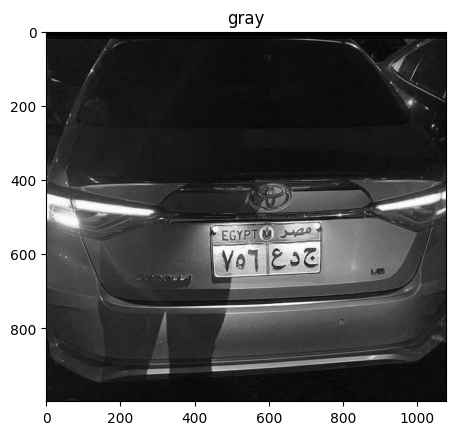

In [24]:
image = cv2.imread("Dataset\\Vehicles\\0100.jpg")  # Load your image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
show_images([gray], ["gray"])

In [25]:
#specify aspect ratio as you want
minAr = 4
maxAr = 5

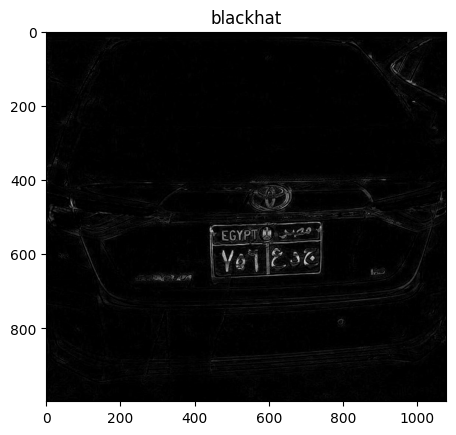

In [41]:
rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKern)
show_images([blackhat], ["blackhat"])

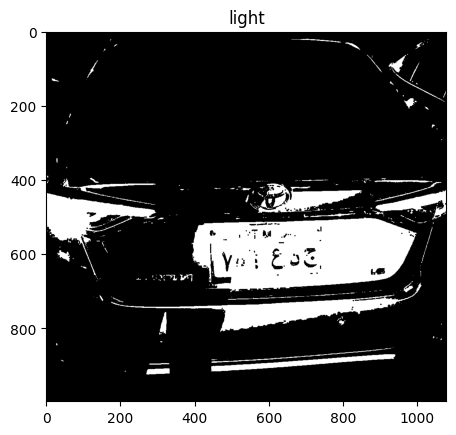

In [28]:
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKern)
light = cv2.threshold(light, 0, 255,
		cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
show_images([light], ["light"])

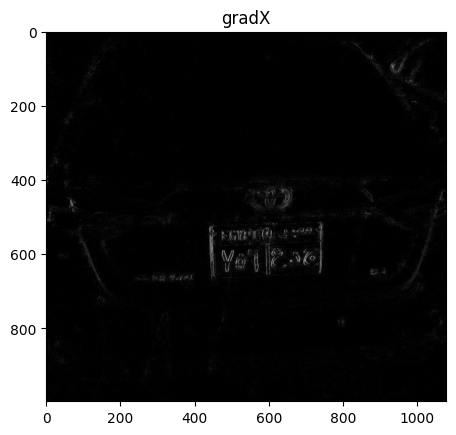

In [29]:
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F,
			dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")
show_images([gradX], ["gradX"])

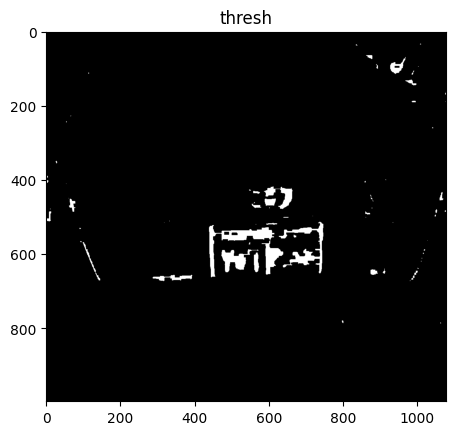

In [30]:
gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKern)
thresh = cv2.threshold(gradX, 0, 255,
			cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
show_images([thresh], ["thresh"])

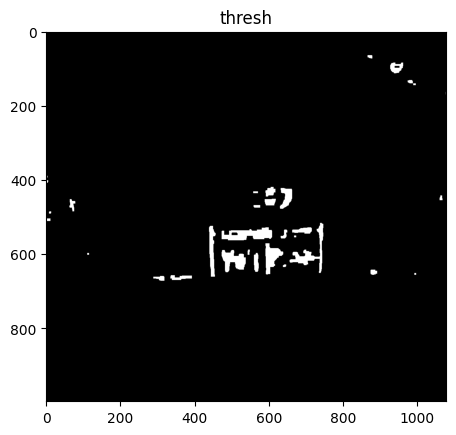

In [31]:
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
show_images([thresh], ["thresh"])

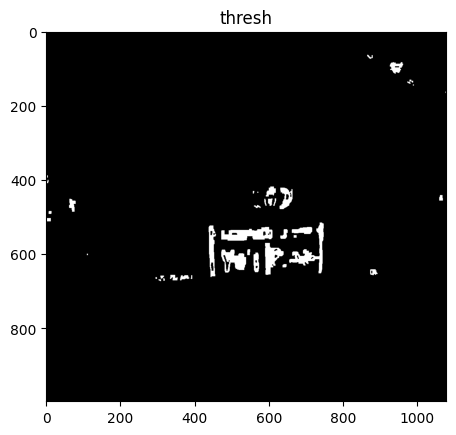

In [32]:
thresh = cv2.bitwise_and(thresh, thresh, mask=light)
thresh = cv2.dilate(thresh, None, iterations=2)
thresh = cv2.erode(thresh, None, iterations=1)
show_images([thresh], ["thresh"])

In [33]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

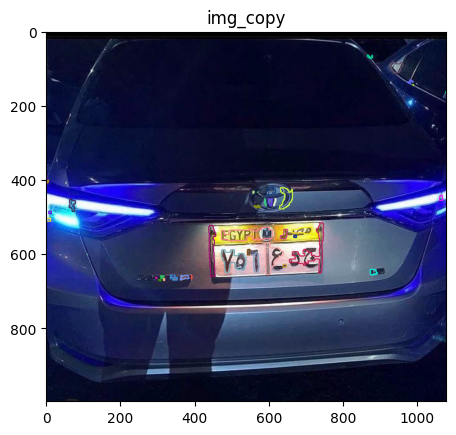

In [36]:
# loop over the contours and draw them
img_copy = image.copy()
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    #each contour with a random color and rectangle
    color = np.random.randint(0, 255, size=(3,)).tolist()
    cv2.drawContours(img_copy, [c], -1, color, 2)
show_images([img_copy], ["img_copy"])

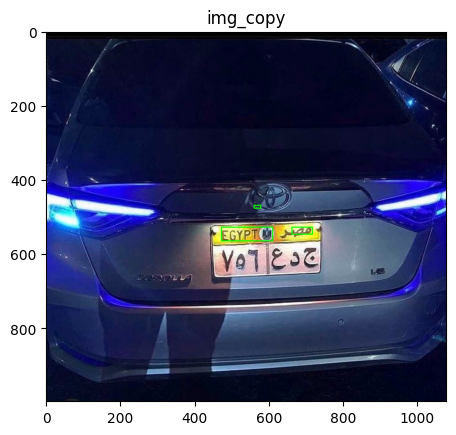

In [38]:
img_copy = image.copy()
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    if ar >= 2 and ar <= 5:
        #draw contours as rectangles and not as contours
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
show_images([img_copy], ["img_copy"])

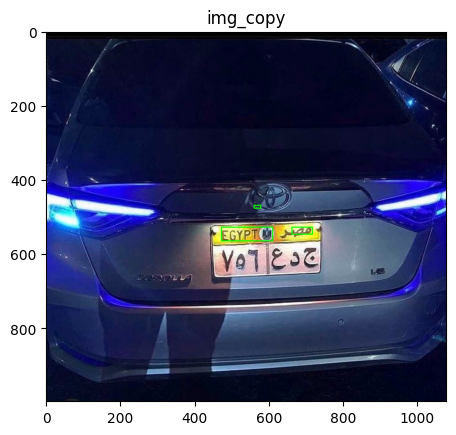

In [ ]:
img_copy = image.copy()
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    if ar >= 2 and ar <= 5:
        #draw contours as rectangles and not as contours
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
show_images([img_copy], ["img_copy"])